# Filtering and business cycles

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from dateutil.relativedelta import relativedelta
from datetime import timedelta

## 0) Load the Data

*In this exercise you need to replicate some business cycle data work that you studied in class
using any programming language of your choice. You are also encouraged to work with your
classmates in completing these coding exercises. In class, I will ask a few of you to present
your results, so try your best to make your codes and plots are as neat as possible.
Download quarterly data for US real GDP, consumption, and investment.1 Take logs of
the data and make sure that your data is seasonally adjusted.*

As a first step, we imported the datasets we are interested in via the. fredapi library. Specifically, we initialized a fred object by providing our key as input. Then, using the get_series function with the codes of the datasets, we downloaded and saved them in different pandas series.

In [3]:
from fredapi import Fred
fred = Fred(api_key = '3c333fd92c7d3df79f55af2ee72f13bf')

start_data = '1960-01-01'
end_data = '2023-03-31'

def get_data(code, start_data = start_data, end_data = end_data):
    return fred.get_series(code, start_data, end_data)

gdp = get_data('GDPC1')
cons = get_data('PCECC96')
inv = get_data('GPDIC1')
rec = get_data('USRECQ')

Give a name to the Series: 

In [4]:
gdp.name = 'gdp'
cons.name = 'cons'
inv.name = 'inv'
rec.name = 'rec'

Apply a log transformation: 

In [5]:
gdp = np.log(gdp)
cons = np.log(cons)
inv = np.log(inv)

Join all the series in one dataframe: 

In [28]:
cols = [gdp, cons, inv,rec]
df = pd.concat(cols, axis = 1)
df = df.assign(Date = df.index.to_pydatetime())

Before starting to solve the exercise we preffered to prepare all the data about filtering now, and the procede to plot: 

## 0.1) Linear trend line

In [29]:
converted_date = df.index.values.astype("float64")
x = np.polyfit(converted_date, df.gdp, 1) #Returns least squares coefficients
z = np.poly1d(x) #create a polynomial function using the above coefficients
lin_trend = pd.Series(z(converted_date), index = df.index)

fluctuations = df.gdp - linear_trend

df = df.assign(lin_trend = lin_trend, lin_fluctuations = fluctuations)


## 0.2) HP Filter

In [30]:
import statsmodels.api as sm
gdp_cycle_1600, gdp_trend_1600 = sm.tsa.filters.hpfilter(df.gdp, 1600)

df = df.assign(gdp_trend_1600 = gdp_trend_1600, gdp_cycle_1600 = gdp_cycle_1600)

In [31]:
gdp_cycle_800, gdp_trend_800 = sm.tsa.filters.hpfilter(df.gdp, 800)

df = df.assign(gdp_trend_800 = gdp_trend_800, gdp_cycle_800 = gdp_cycle_800)


In [32]:
gdp_cycle_400, gdp_trend_400 = sm.tsa.filters.hpfilter(df.gdp, 400)

df = df.assign(gdp_trend_400 = gdp_trend_400, gdp_cycle_400 = gdp_cycle_400)


### Cons and Inv

In [33]:
cons_cycle, cons_tred = sm.tsa.filters.hpfilter(df.cons, 1600)
inv_cycle, inv_trend = sm.tsa.filters.hpfilter(df.inv, 1600)

df = df.assign(cons_trend = cons_tred, cons_cycle = cons_cycle, 
              inv_trend = inv_trend, inv_cycle = inv_cycle)


## DF with only data since 2000

In [34]:
df_2000 = df.loc[df.index >= '2000-01-01', ]
df_2000

,gdp,cons,inv,rec,Date,lin_trend,lin_fluctuations,gdp_trend_1600,gdp_cycle_1600,gdp_trend_800,gdp_cycle_800,gdp_trend_400,gdp_cycle_400,cons_trend,cons_cycle,inv_trend,inv_cycle
2000-01-01,9.467712,9.053176,7.721840,0.0,2000-01-01,9.372413,0.095299,9.453863,0.013848,9.456356,0.011355,9.459164,0.008548,9.036961,0.016215,7.686298,0.035542
2000-04-01,9.485754,9.062471,7.779355,0.0,2000-04-01,9.379609,0.106145,9.461999,0.023755,9.464222,0.021532,9.466779,0.018975,9.047067,0.015403,7.696596,0.082759
2000-07-01,9.486751,9.072006,7.769494,0.0,2000-07-01,9.386805,0.099946,9.469852,0.016899,9.471692,0.015059,9.473837,0.012914,9.056937,0.015069,7.705898,0.063596
2000-10-01,9.492677,9.080705,7.771408,0.0,2000-10-01,9.394080,0.098597,9.477443,0.015234,9.478802,0.013875,9.480392,0.012285,9.066566,0.014138,7.714320,0.057089
2001-01-01,9.489429,9.084325,7.724978,0.0,2001-01-01,9.401356,0.088074,9.484802,0.004627,9.485607,0.003822,9.486530,0.002899,9.075963,0.008362,7.722018,0.002959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,9.899685,9.548838,8.266802,0.0,2022-01-01,10.007890,-0.108205,9.891549,0.008136,9.891490,0.008195,9.891611,0.008074,9.536939,0.011898,8.198098,0.068704
2022-04-01,9.898237,9.553891,8.228704,0.0,2022-04-01,10.015007,-0.116770,9.896932,0.001305,9.897231,0.001006,9.897822,0.000416,9.544141,0.009750,8.204201,0.024503
2022-07-01,9.906217,9.559486,8.203537,0.0,2022-07-01,10.022203,-0.115986,9.902328,0.003889,9.902989,0.003228,9.904040,0.002177,9.551362,0.008124,8.210221,-0.006684
2022-10-01,9.912571,9.562043,8.214500,0.0,2022-10-01,10.029479,-0.116908,9.907729,0.004841,9.908753,0.003818,9.910259,0.002312,9.558592,0.003451,8.216188,-0.001688


## 0.3) Define the style of the graph

In [45]:
plt.style.use('mystyle.mplstyle')

def make_a_line():
    ax.plot([0.12, .9],              # Set width of line
        [1.05, 1.05],                # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
    
    
def make_a_rec():
    ax.add_patch(plt.Rectangle((0.12,1.05),            # Set location of rectangle by lower left corder
                           0.04,                       # Width of rectangle
                           -0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))
    
    
def make_title(text):
    ax.text(x=0.12, y=0.98, s=text, 
            transform=fig.transFigure, ha='left', 
            fontsize=13, weight='bold', alpha=.8)
    
    
def make_description(text):
    ax.text(x=0.12, y=0.93, s=text, 
            transform=fig.transFigure, ha='left', 
            fontsize=11, alpha=.8)

# 1) US GDP and recession periods

For the first graph we plotted the log real gdp and then we added a grey area in the quarters corresponding to a recession period. In order to add the grey rectangles we use the function axvspan, that does exactly this and that needs as input a start and an end value from the x axis. Given that we have a time series, we first extracted all the recession quarters, providing the first day of the quarter as the beginning value, and the last day of the quarter as the end value.

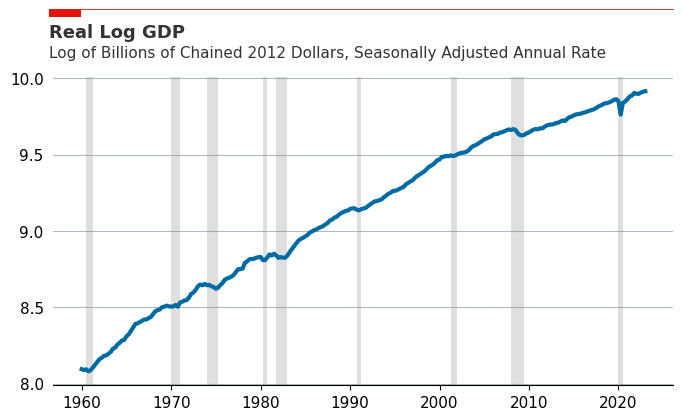

In [46]:
fig, ax = plt.subplots()

ax.plot(df.Date, df.gdp, zorder = 2)

ax.yaxis.set_ticks(np.arange(8,10.1,0.5))

make_a_line()
make_a_rec()
make_title('Real Log GDP')
make_description("Log of Billions of Chained 2012 Dollars, Seasonally Adjusted Annual Rate")

recession = df.loc[df["rec"] == 1, 'Date']
for day in recession: 
    ax.axvspan(day, day + relativedelta(months =+ 3), color="grey", alpha = 0.25, lw=0, zorder = 1)


# 2) Add the trendline

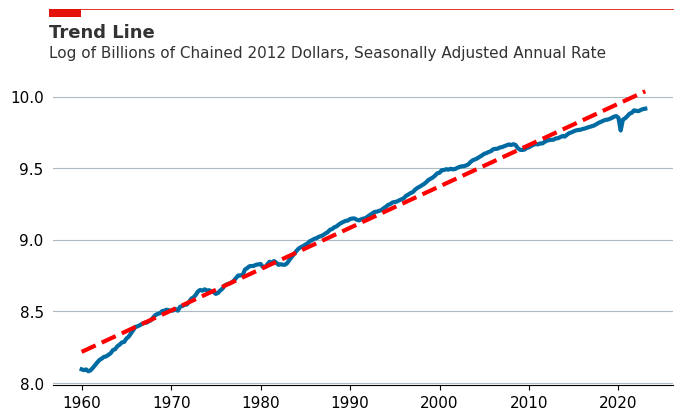

In [49]:
fig, ax = plt.subplots()

ax.plot(df.Date, df.gdp, zorder = 2)
ax.plot(df.Date, df.lin_trend, 'r--')
ax.yaxis.set_ticks(np.arange(8,10.1,0.5))

make_a_line()
make_a_rec()
make_title('Trend Line')
make_description("Log of Billions of Chained 2012 Dollars, Seasonally Adjusted Annual Rate")

## 2.1) Since 2000

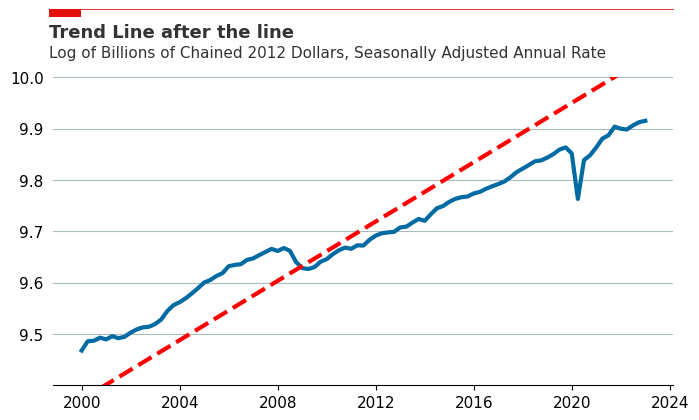

In [51]:
fig, ax = plt.subplots()

ax.plot(df_2000.Date, df_2000.gdp, zorder = 2)
ax.plot(df_2000.Date, df_2000.lin_trend, 'r--')
ax.yaxis.set_ticks(np.arange(9.5,10.1,0.1))

plt.ylim(9.4,10)

make_a_line()
make_a_rec()
make_title('Trend Line after the line')
make_description("Log of Billions of Chained 2012 Dollars, Seasonally Adjusted Annual Rate")

# 3) Show the fluctuations

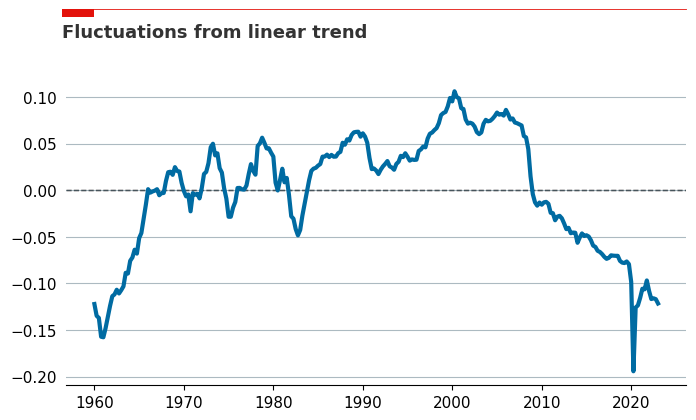

In [53]:
fig, ax = plt.subplots()

ax.plot(df.Date, df.lin_fluctuations, zorder = 2)


plt.axhline(y=0, color = 'black', linestyle= 'dashed', lw = 1, zorder=1)

make_a_line()
make_a_rec()
make_title('Fluctuations from linear trend')

## 3.1) Since 2000

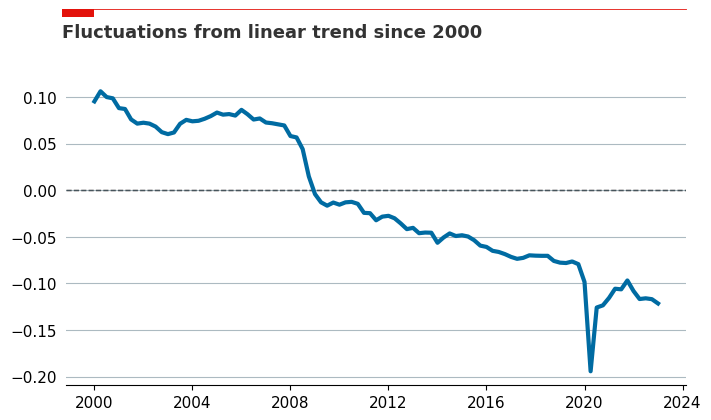

In [55]:
fig, ax = plt.subplots()

ax.plot(df_2000.Date, df_2000.lin_fluctuations, zorder = 2)


plt.axhline(y=0, color = 'black', linestyle= 'dashed', lw = 1, zorder=1)

make_a_line()
make_a_rec()
make_title('Fluctuations from linear trend since 2000')

# 4) HP Filter

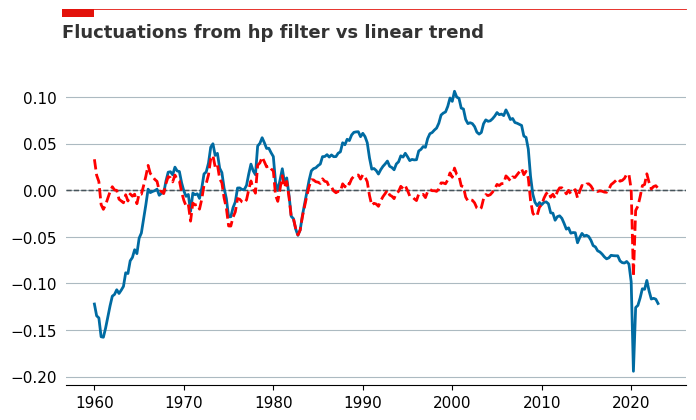

In [57]:
fig, ax = plt.subplots()

ax.plot(df.Date, df.lin_fluctuations, zorder = 2, lw = 2)
ax.plot(df.Date, df.gdp_cycle_1600,  'r--', zorder = 2, lw = 2)


plt.axhline(y=0, color = 'black', linestyle= 'dashed', lw = 1, zorder=1)

make_a_line()
make_a_rec()
make_title('Fluctuations from hp filter vs linear trend')

## 4.1) Since 2000

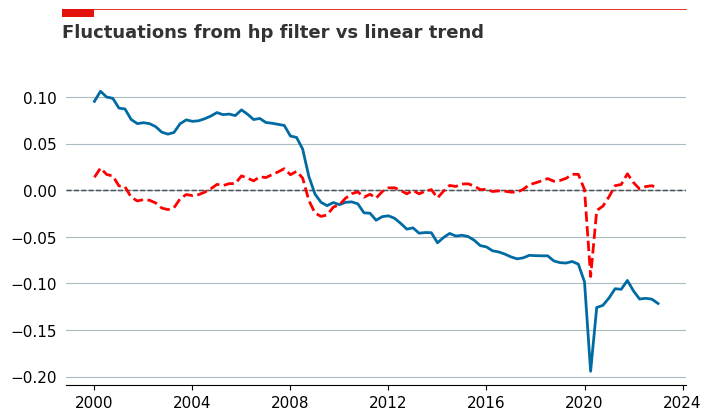

In [59]:
fig, ax = plt.subplots()

ax.plot(df_2000.Date, df_2000.lin_fluctuations, zorder = 2, lw = 2)
ax.plot(df_2000.Date, df_2000.gdp_cycle_1600,  'r--', zorder = 2, lw = 2)


plt.axhline(y=0, color = 'black', linestyle= 'dashed', lw = 1, zorder=1)

make_a_line()
make_a_rec()
make_title('Fluctuations from hp filter vs linear trend')

# 5) Consumption and investment

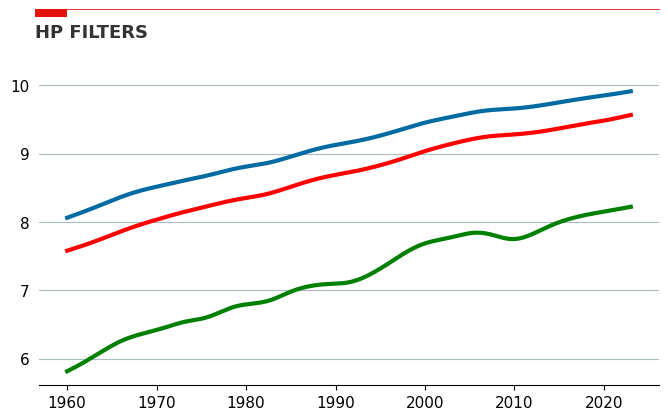

In [60]:
fig, ax = plt.subplots()

ax.plot(df.Date, df.gdp_trend_1600, zorder = 2)
ax.plot(df.Date, df.cons_trend, color = 'red')
ax.plot(df.Date, df.inv_trend, color = 'green')
make_a_line()
make_a_rec()
make_title('HP FILTERS')

# 6) Different level of lambda

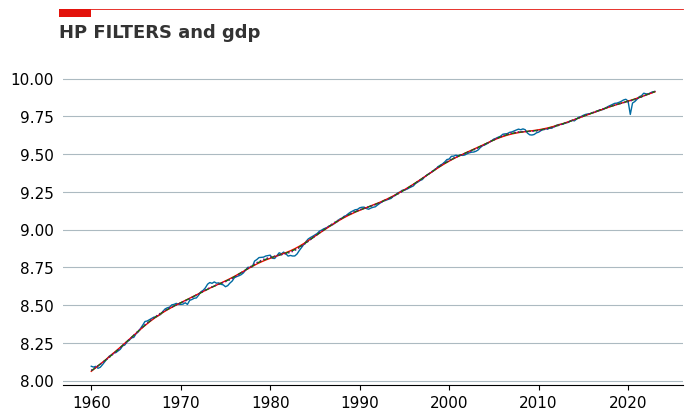

In [61]:
fig, ax = plt.subplots()

ax.plot(df.Date, df.gdp, linewidth = 1)
ax.plot(df.Date, df.gdp_trend_1600, color='red' , linewidth = 1, linestyle = 'solid')
ax.plot(df.Date, df.gdp_trend_800, color = 'green', linewidth = 1, linestyle = 'dashed')
ax.plot(df.Date, df.gdp_trend_400, color = 'purple', linewidth = 1, linestyle ='dotted' )


make_a_line()
make_a_rec()
make_title('HP FILTERS and GDP')

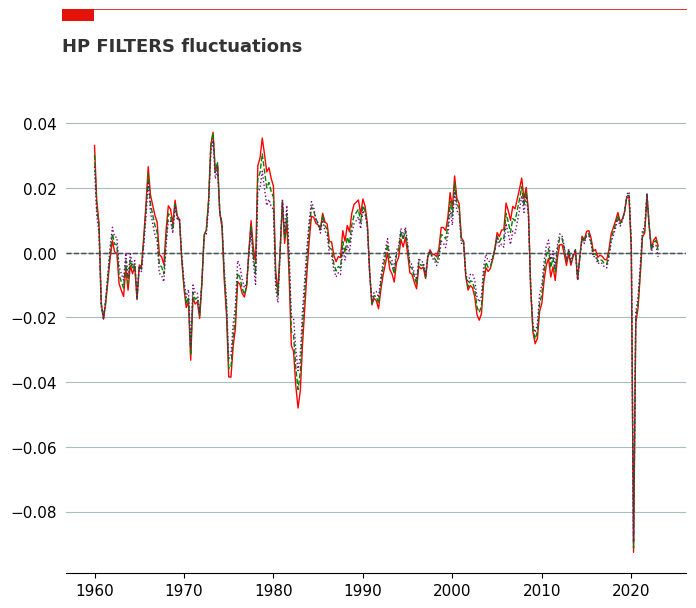

In [62]:
fig, ax = plt.subplots(figsize = (8,6))

ax.plot(df.Date, gdp_cycle_1600, color = 'red', linewidth = 1, linestyle = 'solid')
ax.plot(df.Date, gdp_cycle_800, color = 'green', linewidth = 1, linestyle = 'dashed')
ax.plot(df.Date, gdp_cycle_400, color = 'purple', linewidth = 1, linestyle ='dotted' )

    
plt.axhline(y=0, color = 'black', linestyle= 'dashed', lw = 1, zorder=1)

make_a_line()
make_a_rec()
make_title('HP FILTERS fluctuations')

# 6.1) After 2001

In [ ]:
fig, ax = plt.subplots()

ax.plot(df_2000.Date, df_2000.gdp, linewidth = 1)
ax.plot(df_2000.Date, df_2000.gdp_trend_1600, color='red' , linewidth = 1, linestyle = 'solid')
ax.plot(df.Date, df.gdp_trend_800, color = 'green', linewidth = 1, linestyle = 'dashed')
ax.plot(df.Date, df.gdp_trend_400, color = 'purple', linewidth = 1, linestyle ='dotted' )


make_a_line()
make_a_rec()
make_title('HP FILTERS and GDP')